# Import Librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data

Our goal will be to predict the price of a property using various features.

In [2]:
# !kaggle datasets download -d dansbecker/melbourne-housing-snapshot

In [3]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


<Axes: >

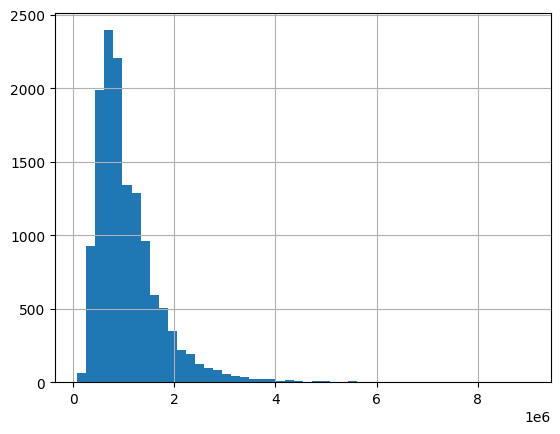

In [4]:
df['Price'].hist(bins=50)

In [5]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In order to simplify this problem, let's keep only a subset of the columns.

In [6]:
df = df[['Rooms','Price','Distance','Type','Lattitude','Longtitude','BuildingArea']]
df.head()

,Rooms,Price,Distance,Type,Lattitude,Longtitude,BuildingArea
0,2,1480000.0,2.5,h,-37.7996,144.9984,NaN
1,2,1035000.0,2.5,h,-37.8079,144.9934,79.0
2,3,1465000.0,2.5,h,-37.8093,144.9944,150.0
3,3,850000.0,2.5,h,-37.7969,144.9969,NaN
4,4,1600000.0,2.5,h,-37.8072,144.9941,142.0


# Basic cleaning

In [7]:
df.isna().sum()

Rooms              0
Price              0
Distance           0
Type               0
Lattitude          0
Longtitude         0
BuildingArea    6450
dtype: int64

In [8]:
df.loc[:,"BuildingArea"] = df["BuildingArea"].median()

In [9]:
df.isna().sum()

Rooms           0
Price           0
Distance        0
Type            0
Lattitude       0
Longtitude      0
BuildingArea    0
dtype: int64

Let's encode the type, which is a categorical feature.

In [10]:
df['Type'].unique()

array(['h', 'u', 't'], dtype=object)

In [11]:
df['Type'].value_counts()

h    9449
u    3017
t    1114
Name: Type, dtype: int64

In [12]:
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(sparse=False)

In [13]:
encoding = OH_encoder.fit_transform(df[["Type"]])
encoding

/home/jean/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [14]:
OH_encoder.categories_

[array(['h', 't', 'u'], dtype=object)]

In [15]:
cols = pd.DataFrame(encoding, columns=['h', 't', 'u'])
cols

,h,t,u
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
13575,1.0,0.0,0.0
13576,1.0,0.0,0.0
13577,1.0,0.0,0.0
13578,1.0,0.0,0.0


In [16]:
df_prepared = df.join(cols).drop(['Type'], axis = 1)
df_prepared

,Rooms,Price,Distance,Lattitude,Longtitude,BuildingArea,h,t,u
0,2,1480000.0,2.5,-37.79960,144.99840,126.0,1.0,0.0,0.0
1,2,1035000.0,2.5,-37.80790,144.99340,126.0,1.0,0.0,0.0
2,3,1465000.0,2.5,-37.80930,144.99440,126.0,1.0,0.0,0.0
3,3,850000.0,2.5,-37.79690,144.99690,126.0,1.0,0.0,0.0
4,4,1600000.0,2.5,-37.80720,144.99410,126.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
13575,4,1245000.0,16.7,-37.90562,145.16761,126.0,1.0,0.0,0.0
13576,3,1031000.0,6.8,-37.85927,144.87904,126.0,1.0,0.0,0.0
13577,3,1170000.0,6.8,-37.85274,144.88738,126.0,1.0,0.0,0.0
13578,4,2500000.0,6.8,-37.85908,144.89299,126.0,1.0,0.0,0.0


# Data Split

In [17]:
df_prepared.shape

(13580, 9)

In [18]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

Basic split :

In [19]:
train_set, test_set = train_test_split(df_prepared, test_size=0.2)

In [20]:
X_train = train_set.drop(['Price'], axis = 1)
Y_train = train_set['Price']
X_test = train_set.drop(['Price'], axis = 1)
Y_test = train_set['Price']

In [21]:
X_train.head()

,Rooms,Distance,Lattitude,Longtitude,BuildingArea,h,t,u
3681,4,5.6,-37.80330,145.05260,126.0,1.0,0.0,0.0
624,2,9.2,-37.79410,145.10420,126.0,1.0,0.0,0.0
8544,3,7.0,-37.81490,144.89420,126.0,1.0,0.0,0.0
11545,4,3.1,-37.80884,144.95291,126.0,1.0,0.0,0.0
8493,4,8.2,-37.79690,144.86470,126.0,1.0,0.0,0.0


# Model Definition

In [22]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

# Model Training

In [23]:
lin_model.fit(X_train,Y_train)

LinearRegression()

# Model Prediction

In [24]:
y_pred = lin_model.predict(X_test)

In [25]:
y_pred.shape

(10864,)

In [26]:
y_test_np = Y_test.array
y_test_np.shape

(10864,)

# Mean Square Error

In [27]:
MSE = np.mean((y_pred-y_test_np)**2)
MSE

192746357296.43887

In [28]:
np.sqrt(MSE)

439028.87979771773

In [29]:
MSE = np.mean(y_pred-y_test_np)**2
MSE

1.0105031600743004e-15

In [30]:
np.mean(y_pred-y_test_np)

-3.1788412355358365e-08

In [31]:
np.max(y_pred-y_test_np)

2183047.5463852286

In [32]:
np.min(y_pred-y_test_np)

-6035807.654897213

Attention à ne pas tomber dans ce piège ! 

(array([1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 5.000e+00,
        4.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 1.100e+01, 2.600e+01,
        1.200e+01, 1.000e+01, 3.000e+01, 3.000e+01, 5.300e+01, 8.100e+01,
        1.000e+02, 1.390e+02, 2.100e+02, 3.730e+02, 5.900e+02, 1.248e+03,
        2.088e+03, 2.671e+03, 1.884e+03, 8.510e+02, 3.050e+02, 8.800e+01,
        2.300e+01, 8.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([-6035807.65489721, -5871430.55087156, -5707053.44684592,
        -5542676.34282027, -5378299.23879462, -5213922.13476897,
        -5049545.03074332, -4885167.92671767, -4720790.82269202,
        -4556413.71866637, -4392036.61464072, -4227659.51061508,
        -4063282.40658943, -3898905.30256378, -3734528.19853813,
        -3570151.09451248, -3405773.99048683, -3241

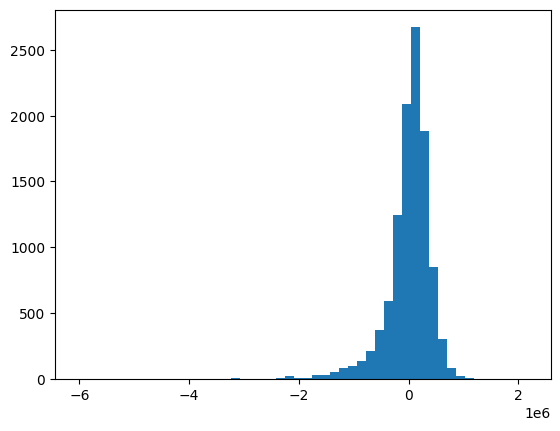

In [33]:
plt.hist(y_pred-y_test_np, bins=50)

# Regularization

## LASSO Regularization (L1-penalization)

In [34]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=1e3) # if alpha is not at least 1e3, it has no effect
# it is mostly because the values of price are huge and I haven't rescaled them

Normally, you have to normalize the data before using LASSO or RIDGE !

In [35]:
lasso_reg.fit(X_train,Y_train)
y_pred_lasso = lasso_reg.predict(X_test)

### MSE

In [36]:
MSE = np.mean((y_pred_lasso-y_test_np)**2)
MSE

192970545732.53247

In [37]:
np.sqrt(MSE)

439284.1287054797

(array([1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 5.000e+00,
        4.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 1.100e+01, 2.400e+01,
        1.400e+01, 1.200e+01, 2.900e+01, 3.500e+01, 5.400e+01, 7.900e+01,
        1.030e+02, 1.460e+02, 2.220e+02, 3.820e+02, 6.080e+02, 1.286e+03,
        2.146e+03, 2.694e+03, 1.811e+03, 8.000e+02, 2.760e+02, 6.800e+01,
        2.600e+01, 5.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([-6043423.46462029, -5878539.3724127 , -5713655.28020511,
        -5548771.18799751, -5383887.09578992, -5219003.00358233,
        -5054118.91137473, -4889234.81916714, -4724350.72695955,
        -4559466.63475195, -4394582.54254436, -4229698.45033677,
        -4064814.35812917, -3899930.26592158, -3735046.17371399,
        -3570162.08150639, -3405277.9892988 , -3240

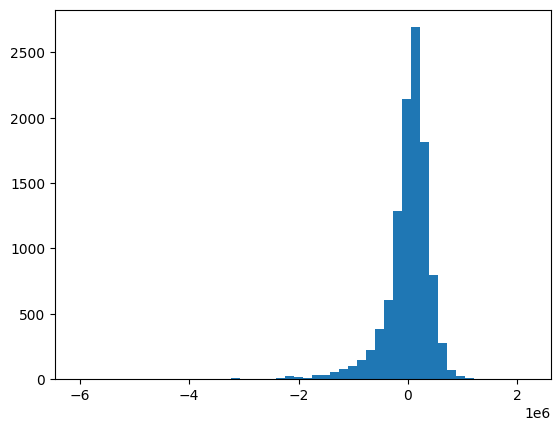

In [38]:
plt.hist(y_pred_lasso-y_test_np, bins=50)

## Ridge Regularization (L2-penalization)

Let's rescale this time. I use sklearn's standard scaler to rescale X_train and do it manually for Y_train. This is because I will need the mean and variance of Y_train to rescale my model predictions.

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
X_train.head()

,Rooms,Distance,Lattitude,Longtitude,BuildingArea,h,t,u
3681,4,5.6,-37.80330,145.05260,126.0,1.0,0.0,0.0
624,2,9.2,-37.79410,145.10420,126.0,1.0,0.0,0.0
8544,3,7.0,-37.81490,144.89420,126.0,1.0,0.0,0.0
11545,4,3.1,-37.80884,144.95291,126.0,1.0,0.0,0.0
8493,4,8.2,-37.79690,144.86470,126.0,1.0,0.0,0.0


In [41]:
X_train.describe()

,Rooms,Distance,Lattitude,Longtitude,BuildingArea,h,t,u
count,10864.000000,10864.000000,10864.000000,10864.000000,10864.0,10864.000000,10864.000000,10864.000000
mean,2.934094,10.098380,-37.809549,144.995609,126.0,0.693023,0.083671,0.223306
std,0.960071,5.862191,0.078820,0.103531,0.0,0.461261,0.276906,0.416481
min,1.000000,0.000000,-38.182550,144.431810,126.0,0.000000,0.000000,0.000000
25%,2.000000,6.100000,-37.856800,144.930475,126.0,0.000000,0.000000,0.000000
50%,3.000000,9.200000,-37.802300,145.000100,126.0,1.000000,0.000000,0.000000
75%,3.000000,13.000000,-37.757300,145.058100,126.0,1.000000,0.000000,0.000000
max,10.000000,48.100000,-37.408530,145.526350,126.0,1.000000,1.000000,1.000000


In [42]:
scaler = StandardScaler()
scaled_cols = scaler.fit_transform(X_train)
X_train = pd.DataFrame(scaled_cols, columns = X_train.columns)
X_train

,Rooms,Distance,Lattitude,Longtitude,BuildingArea,h,t,u
0,1.110288,-0.767390,0.079287,0.550500,0.0,0.665548,-0.302177,-0.536199
1,-0.972988,-0.153257,0.196015,1.048927,0.0,0.665548,-0.302177,-0.536199
2,0.068650,-0.528561,-0.067891,-0.979554,0.0,0.665548,-0.302177,-0.536199
3,1.110288,-1.193871,0.008997,-0.412448,0.0,0.665548,-0.302177,-0.536199
4,1.110288,-0.323849,0.160489,-1.264507,0.0,0.665548,-0.302177,-0.536199
...,...,...,...,...,...,...,...,...
10859,-0.972988,-0.323849,0.070406,-1.143764,0.0,0.665548,-0.302177,-0.536199
10860,2.151926,-0.187375,0.383795,0.674141,0.0,0.665548,-0.302177,-0.536199
10861,0.068650,-0.630916,0.094513,-0.946712,0.0,-1.502522,3.309319,-0.536199
10862,0.068650,0.375580,-1.171983,0.772667,0.0,0.665548,-0.302177,-0.536199


In [43]:
X_train.describe()

,Rooms,Distance,Lattitude,Longtitude,BuildingArea,h,t,u
count,1.086400e+04,1.086400e+04,1.086400e+04,1.086400e+04,10864.0,1.086400e+04,1.086400e+04,1.086400e+04
mean,2.204095e-16,5.951711e-17,5.082630e-14,-1.611239e-13,0.0,-6.540342e-18,-1.635085e-18,3.270171e-18
std,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,0.0,1.000046e+00,1.000046e+00,1.000046e+00
min,-2.014626e+00,-1.722708e+00,-4.732560e+00,-5.445978e+00,0.0,-1.502522e+00,-3.021769e-01,-5.361986e-01
25%,-9.729882e-01,-6.820938e-01,-5.995098e-01,-6.291578e-01,0.0,-1.502522e+00,-3.021769e-01,-5.361986e-01
50%,6.864993e-02,-1.532569e-01,9.197518e-02,4.338011e-02,0.0,6.655478e-01,-3.021769e-01,-5.361986e-01
75%,6.864993e-02,4.949947e-01,6.629261e-01,6.036272e-01,0.0,6.655478e-01,-3.021769e-01,-5.361986e-01
max,7.360117e+00,6.482793e+00,5.088049e+00,5.126656e+00,0.0,6.655478e-01,3.309319e+00,1.864981e+00


Let's resize Y_train : 

In [44]:
y_mean, y_std = Y_train.mean(), Y_train.std()
Y_train = (Y_train - y_mean) / y_std

In [45]:
Y_train.describe()

count    1.086400e+04
mean     6.213325e-17
std      1.000000e+00
min     -1.564040e+00
25%     -6.686916e-01
50%     -2.709349e-01
75%      4.088962e-01
max      1.097877e+01
Name: Price, dtype: float64

Now let's deal with X_test : 

In [46]:
scaled_cols_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(scaled_cols_test, columns = X_test.columns)
X_test

,Rooms,Distance,Lattitude,Longtitude,BuildingArea,h,t,u
0,1.110288,-0.767390,0.079287,0.550500,0.0,0.665548,-0.302177,-0.536199
1,-0.972988,-0.153257,0.196015,1.048927,0.0,0.665548,-0.302177,-0.536199
2,0.068650,-0.528561,-0.067891,-0.979554,0.0,0.665548,-0.302177,-0.536199
3,1.110288,-1.193871,0.008997,-0.412448,0.0,0.665548,-0.302177,-0.536199
4,1.110288,-0.323849,0.160489,-1.264507,0.0,0.665548,-0.302177,-0.536199
...,...,...,...,...,...,...,...,...
10859,-0.972988,-0.323849,0.070406,-1.143764,0.0,0.665548,-0.302177,-0.536199
10860,2.151926,-0.187375,0.383795,0.674141,0.0,0.665548,-0.302177,-0.536199
10861,0.068650,-0.630916,0.094513,-0.946712,0.0,-1.502522,3.309319,-0.536199
10862,0.068650,0.375580,-1.171983,0.772667,0.0,0.665548,-0.302177,-0.536199


In [73]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1) # if alpha is not at least 1e3, it has no effect
# it is mostly because the values of price are huge and I haven't rescaled them

In [74]:
ridge_reg.fit(X_train,Y_train)
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_ridge = y_pred_ridge * y_std + y_mean # /!\ It is NECESSARY to scale back no normal !!!!!

# MSE

In [75]:
MSE = np.mean((y_pred_ridge-y_test_np)**2)
MSE

192746359783.02203

In [76]:
np.sqrt(MSE)

439028.8826296307

No significant improvement compared to the non-regularized basic Regression.

# Improvements of data split

<Axes: >

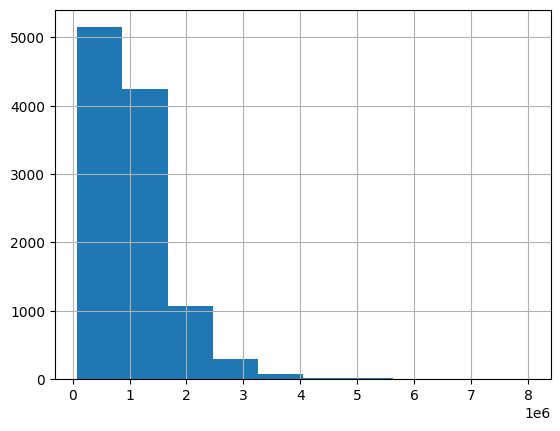

In [51]:
train_set["Price"].hist(bins=10)

<Axes: >

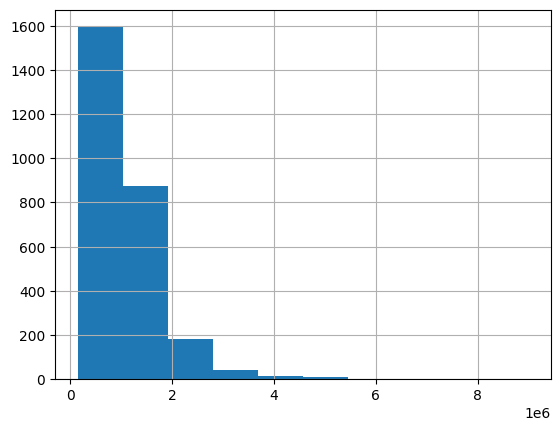

In [52]:
test_set["Price"].hist(bins=10)

Even if the plots are not very detailed, we observe that the distributions are not the same. The original distribution was : 

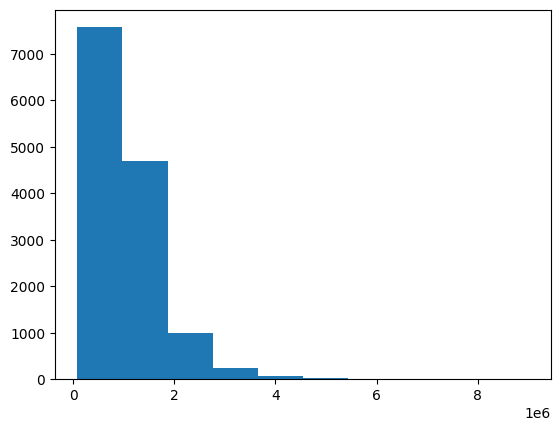

In [53]:
n, bins, _ = plt.hist(df['Price'], bins = 10)

It's closer to the train set distribution. To fix this issue, let's use the StratifiedShuffle splitter. First we need to categorise the data.

In [54]:
bins

array([  85000.,  976500., 1868000., 2759500., 3651000., 4542500.,
       5434000., 6325500., 7217000., 8108500., 9000000.])

In [55]:
bins[-1] = np.inf
bins

array([  85000.,  976500., 1868000., 2759500., 3651000., 4542500.,
       5434000., 6325500., 7217000., 8108500.,      inf])

In [56]:
df["price_cat"] = pd.cut(df["Price"], bins = bins, labels = list(range(10)))
df.head()

,Rooms,Price,Distance,Type,Lattitude,Longtitude,BuildingArea,price_cat
0,2,1480000.0,2.5,h,-37.7996,144.9984,126.0,1
1,2,1035000.0,2.5,h,-37.8079,144.9934,126.0,1
2,3,1465000.0,2.5,h,-37.8093,144.9944,126.0,1
3,3,850000.0,2.5,h,-37.7969,144.9969,126.0,0
4,4,1600000.0,2.5,h,-37.8072,144.9941,126.0,1


In [57]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_idx in split.split(df, df['price_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

ValueError: Input y contains NaN.